In [10]:
# import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# create a set of random latitude and longitude combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [12]:
coordinates=list(lat_lngs)

In [13]:
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)


In [15]:
# import datetime library and time library
import time
from datetime import datetime
import requests
import config

weather_api_key = config.weather_api_key
#print(weather_api_key)
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=5124662f7a64fca11f3b4e2e3681845d


In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop through all ythe cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
City not found. Skipping...
Processing Record 2 of Set 1 | berlevag
City not found. Skipping...
Processing Record 3 of Set 1 | avarua
City not found. Skipping...
Processing Record 4 of Set 1 | fairbanks
City not found. Skipping...
Processing Record 5 of Set 1 | rudnichnyy
City not found. Skipping...
Processing Record 6 of Set 1 | karaton
City not found. Skipping...
Processing Record 7 of Set 1 | kemijarvi
City not found. Skipping...
Processing Record 8 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 9 of Set 1 | kapaa
City not found. Skipping...
Processing Record 10 of Set 1 | karratha
City not found. Skipping...
Processing Record 11 of Set 1 | pacific grove
City not found. Skipping...
Processing Record 12 of Set 1 | thompson
City not found. Skipping...
Processing Record 13 of Set 1 | vaini
City not found. Skipping...
Processing Record 14 of Set 1 | yerbogachen
City 

City not found. Skipping...
Processing Record 19 of Set 3 | belaya gora
City not found. Skipping...
Processing Record 20 of Set 3 | banjar
City not found. Skipping...
Processing Record 21 of Set 3 | vestmannaeyjar
City not found. Skipping...
Processing Record 22 of Set 3 | airai
City not found. Skipping...
Processing Record 23 of Set 3 | cape town
City not found. Skipping...
Processing Record 24 of Set 3 | khatanga
City not found. Skipping...
Processing Record 25 of Set 3 | axim
City not found. Skipping...
Processing Record 26 of Set 3 | merauke
City not found. Skipping...
Processing Record 27 of Set 3 | faanui
City not found. Skipping...
Processing Record 28 of Set 3 | tokur
City not found. Skipping...
Processing Record 29 of Set 3 | marawi
City not found. Skipping...
Processing Record 30 of Set 3 | babushkin
City not found. Skipping...
Processing Record 31 of Set 3 | severomuysk
City not found. Skipping...
Processing Record 32 of Set 3 | kovdor
City not found. Skipping...
Processing 

City not found. Skipping...
Processing Record 37 of Set 5 | candelaria
City not found. Skipping...
Processing Record 38 of Set 5 | tura
City not found. Skipping...
Processing Record 39 of Set 5 | longyearbyen
City not found. Skipping...
Processing Record 40 of Set 5 | nome
City not found. Skipping...
Processing Record 41 of Set 5 | amapa
City not found. Skipping...
Processing Record 42 of Set 5 | xushan
City not found. Skipping...
Processing Record 43 of Set 5 | tapaua
City not found. Skipping...
Processing Record 44 of Set 5 | port blair
City not found. Skipping...
Processing Record 45 of Set 5 | richards bay
City not found. Skipping...
Processing Record 46 of Set 5 | aswan
City not found. Skipping...
Processing Record 47 of Set 5 | mount gambier
City not found. Skipping...
Processing Record 48 of Set 5 | ingham
City not found. Skipping...
Processing Record 49 of Set 5 | severo-kurilsk
City not found. Skipping...
Processing Record 50 of Set 5 | nelson bay
City not found. Skipping...
P

City not found. Skipping...
Processing Record 6 of Set 8 | sabang
City not found. Skipping...
Processing Record 7 of Set 8 | morrinhos
City not found. Skipping...
Processing Record 8 of Set 8 | dvorichna
City not found. Skipping...
Processing Record 9 of Set 8 | sigli
City not found. Skipping...
Processing Record 10 of Set 8 | ngunguru
City not found. Skipping...
Processing Record 11 of Set 8 | boyolangu
City not found. Skipping...
Processing Record 12 of Set 8 | katsuura
City not found. Skipping...
Processing Record 13 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 14 of Set 8 | karasuk
City not found. Skipping...
Processing Record 15 of Set 8 | dungarpur
City not found. Skipping...
Processing Record 16 of Set 8 | samusu
City not found. Skipping...
Processing Record 17 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 8 | beloha
City not found. Skipping...
Processing Record 19 of Set 8 | barra patuca
City not found. Skipping...
Processi

City not found. Skipping...
Processing Record 25 of Set 10 | asau
City not found. Skipping...
Processing Record 26 of Set 10 | taunggyi
City not found. Skipping...
Processing Record 27 of Set 10 | urucara
City not found. Skipping...
Processing Record 28 of Set 10 | kedrovyy
City not found. Skipping...
Processing Record 29 of Set 10 | worland
City not found. Skipping...
Processing Record 30 of Set 10 | port lincoln
City not found. Skipping...
Processing Record 31 of Set 10 | shahr-e kord
City not found. Skipping...
Processing Record 32 of Set 10 | jagupit
City not found. Skipping...
Processing Record 33 of Set 10 | luangwa
City not found. Skipping...
Processing Record 34 of Set 10 | atambua
City not found. Skipping...
Processing Record 35 of Set 10 | peleduy
City not found. Skipping...
Processing Record 36 of Set 10 | bethanien
City not found. Skipping...
Processing Record 37 of Set 10 | mrirt
City not found. Skipping...
Processing Record 38 of Set 10 | wilmington
City not found. Skippi

City not found. Skipping...
Processing Record 43 of Set 12 | san jose de guanipa
City not found. Skipping...
Processing Record 44 of Set 12 | tosya
City not found. Skipping...
Processing Record 45 of Set 12 | ikom
City not found. Skipping...
Processing Record 46 of Set 12 | kaduqli
City not found. Skipping...
Processing Record 47 of Set 12 | qaqortoq
City not found. Skipping...
Processing Record 48 of Set 12 | rodrigues alves
City not found. Skipping...
Processing Record 49 of Set 12 | mocuba
City not found. Skipping...
Processing Record 50 of Set 12 | mount darwin
City not found. Skipping...
Processing Record 1 of Set 13 | coeneo
City not found. Skipping...
Processing Record 2 of Set 13 | rzeszow
City not found. Skipping...
Processing Record 3 of Set 13 | jizan
City not found. Skipping...
Processing Record 4 of Set 13 | coquimbo
City not found. Skipping...
Processing Record 5 of Set 13 | praya
City not found. Skipping...
Processing Record 6 of Set 13 | barrancabermeja
City not found. 

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jalu,29.0331,21.5482,13.97,40,100,1.13,LY,2021-12-22 19:08:42
1,Jacareacanga,-6.2222,-57.7528,33.00,49,100,1.26,BR,2021-12-22 19:08:42
2,Cape Town,-33.9258,18.4232,22.84,78,80,2.24,ZA,2021-12-22 19:06:10
3,Lagoa,39.0500,-27.9833,15.02,66,100,14.00,PT,2021-12-22 19:08:43
4,Haines Junction,60.7522,-137.5108,-28.22,97,50,1.01,CA,2021-12-22 19:08:43
5,Iqaluit,63.7506,-68.5145,-18.65,91,96,0.89,CA,2021-12-22 19:08:43
6,Yantikovo,55.8216,47.9104,-21.60,97,99,2.34,RU,2021-12-22 19:08:44
7,Methoni,36.8197,21.7049,12.34,64,63,2.57,GR,2021-12-22 19:08:44
8,Porto Novo,6.4965,2.6036,27.30,50,41,2.72,BJ,2021-12-22 19:05:37
9,Vincennes,48.8500,2.4333,0.31,87,90,0.89,FR,2021-12-22 19:08:45


In [72]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import time
import time

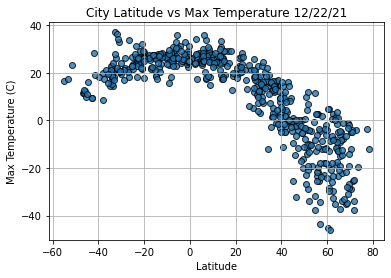

In [15]:
# 6.3.1 build scatter plot for lat vs max temp

plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

#add other properties
plt.title(f"City Latitude vs Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()


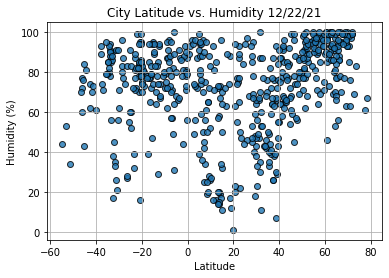

In [16]:
# 6.3.2 Latitude vs Humidity

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

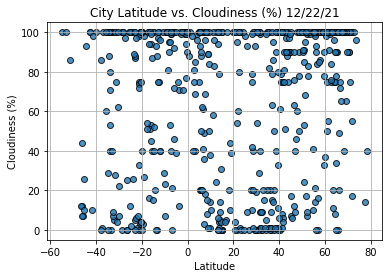

In [17]:
# 6.3.3 Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

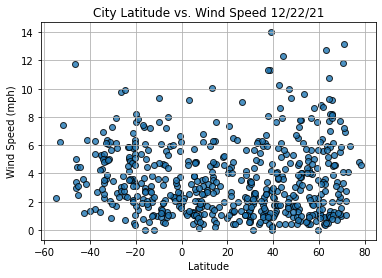

In [18]:
# 6.3.4 Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [52]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + f" R={r_value:.2}"
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [53]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

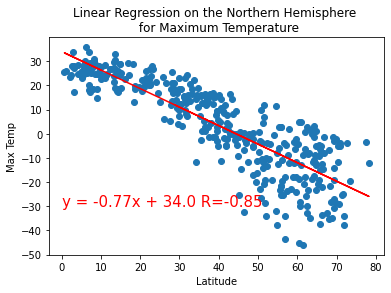

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,-30))

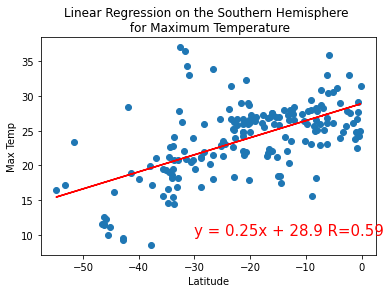

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,10))

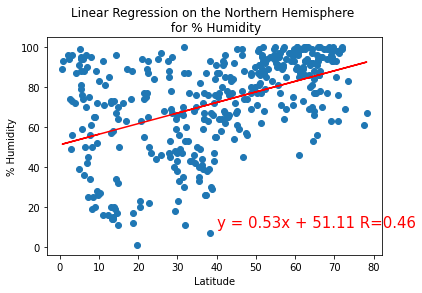

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

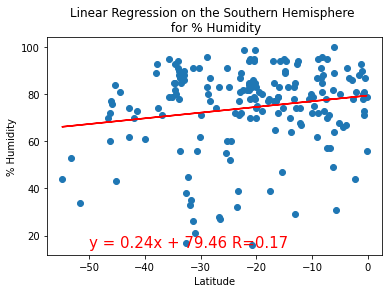

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

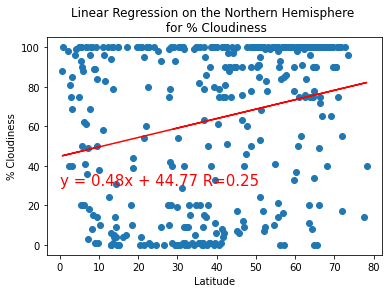

In [65]:
# linear regression on northern hemisphere cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness','% Cloudiness',(0,30))

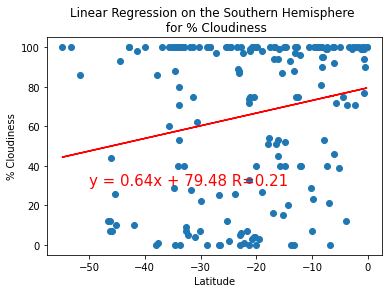

In [67]:
# linear regression on northern hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#call function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness','% Cloudiness',(-50,30))

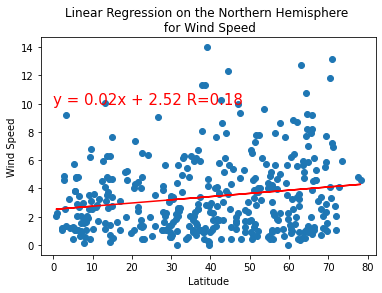

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,10))

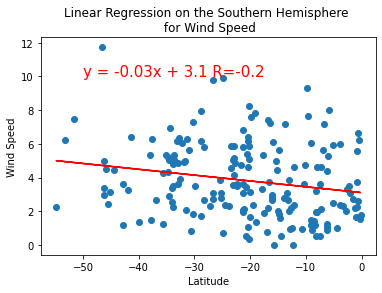

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,10))